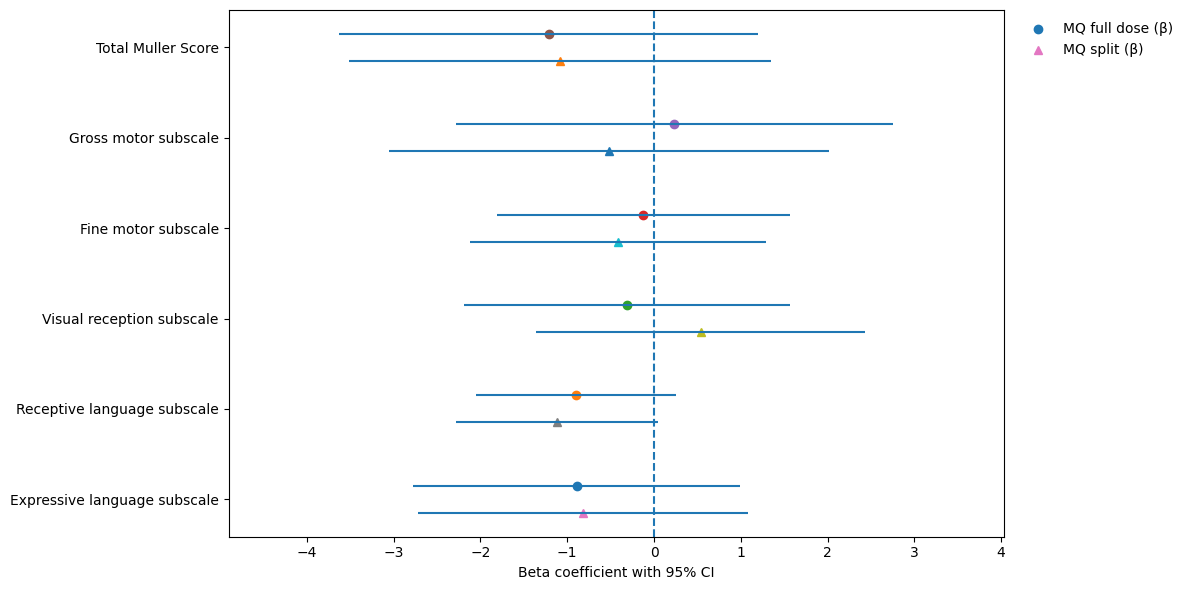

In [ ]:
# Forest plot for unadjusted beta coefficients:
# Effect of MQ regimen (full dose or split) vs reference on Mullen subscales and total score

import matplotlib.pyplot as plt
import numpy as np

# Ordered labels (your order)
outcomes = [
    'Expressive language subscale',
    'Receptive language subscale',
    'Visual reception subscale',
    'Fine motor subscale',
    'Gross motor subscale',
    'Total Muller Score'
]

# Unadjusted betas and 95% CIs from your GLMs (MQ vs reference)
# Each outcome has two entries: [MQ full dose, MQ split]
betas = {
    'Expressive language subscale':    [-0.8932,  -0.8156],
    'Receptive language subscale':     [-0.9014,  -1.1148],
    'Visual reception subscale':       [-0.3115,   0.5369],
    'Fine motor subscale':             [-0.1239,  -0.4180],
    'Gross motor subscale':             [0.2345,  -0.5205],
    'Total Muller Score':              [-1.2136,  -1.0861],
}

cis = {
    'Expressive language subscale':    [(-2.778192, 0.9916968),  (-2.715658, 1.0845108)],
    'Receptive language subscale':     [(-2.055836, 0.25307779), (-2.278484, 0.04897572)],
    'Visual reception subscale':       [(-2.195616, 1.572536),   (-1.362324, 2.436095)],
    'Fine motor subscale':             [(-1.813329, 1.565605),   (-2.121070, 1.285004)],
    'Gross motor subscale':            [(-2.283983, 2.753018),   (-3.059221, 2.018238)],
    'Total Muller Score':              [(-3.627033, 1.199892),   (-3.518914, 1.346782)],
}

# Build arrays in plotting order
y_pos = np.arange(len(outcomes))
beta_full  = [betas[o][0] for o in outcomes]
beta_split = [betas[o][1] for o in outcomes]
ci_full    = [cis[o][0] for o in outcomes]
ci_split   = [cis[o][1] for o in outcomes]

fig, ax = plt.subplots(figsize=(12, 6))

# Reference line at 0 (no effect)
ax.axvline(x=0, linestyle='--')

# Offset so the two groups don't overlap
offset = 0.15

# MQ full dose (circles)
for i, (b, (lo, hi)) in enumerate(zip(beta_full, ci_full)):
    ax.plot(b, y_pos[i] + offset, 'o', label='MQ full dose (β)' if i == 0 else "")
    ax.hlines(y=y_pos[i] + offset, xmin=lo, xmax=hi)

# MQ split (triangles)
for i, (b, (lo, hi)) in enumerate(zip(beta_split, ci_split)):
    ax.plot(b, y_pos[i] - offset, '^', label='MQ split (β)' if i == 0 else "")
    ax.hlines(y=y_pos[i] - offset, xmin=lo, xmax=hi)

# Axes & labels
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)
ax.set_xlabel('Beta coefficient with 95% CI')


# X-limits to fit all CIs comfortably
xmin = min(min(lo for lo, _ in ci_full),  min(lo for lo, _ in ci_split))
xmax = max(max(hi for _, hi in ci_full),  max(hi for _, hi in ci_split))
pad = 0.2 * (xmax - xmin if xmax > xmin else 1.0)
ax.set_xlim(xmin - pad, xmax + pad)

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False)

plt.tight_layout()
plt.show()


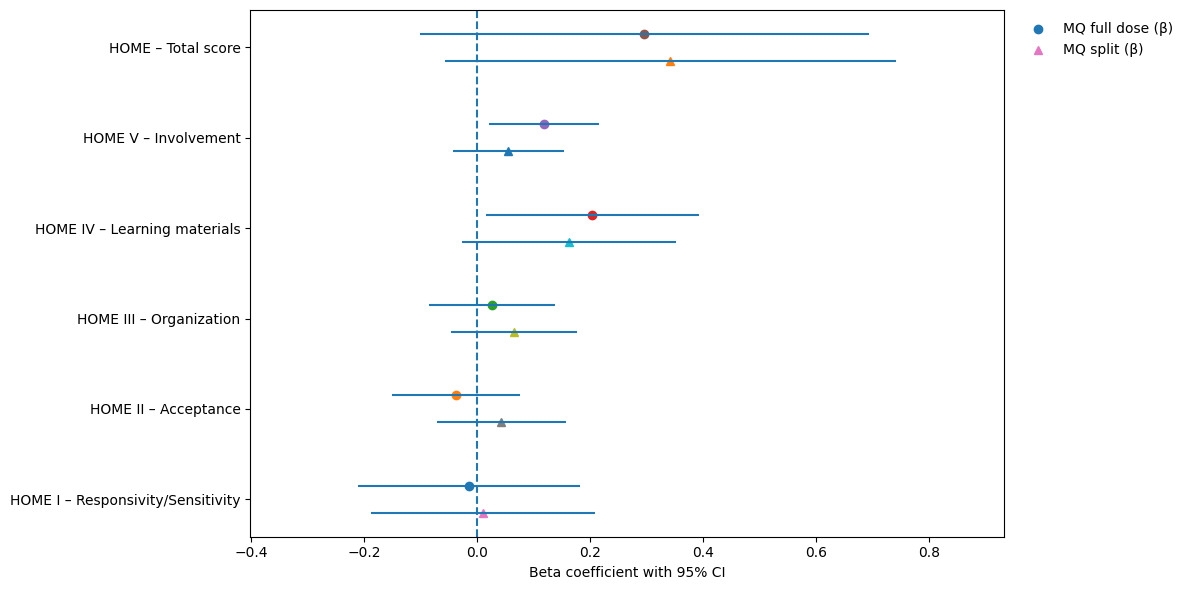

In [ ]:
# Forest plot of unadjusted beta coefficients (HOME scale)
# Effect of MQ regimen (full dose or split) vs reference on HOME subscales and total score

import matplotlib.pyplot as plt
import numpy as np

# HOME domains in order
outcomes = [
    'HOME I – Responsivity/Sensitivity',
    'HOME II – Acceptance',
    'HOME III – Organization',
    'HOME IV – Learning materials',
    'HOME V – Involvement',
    'HOME – Total score'
]

# Betas (MQ vs reference): [MQ full dose, MQ split]
betas = {
    'HOME I – Responsivity/Sensitivity': [-0.01441,  0.01073],
    'HOME II – Acceptance':              [-0.03794,  0.04289],
    'HOME III – Organization':           [ 0.02677,  0.06532],
    'HOME IV – Learning materials':      [ 0.20386,  0.16217],
    'HOME V – Involvement':              [ 0.11883,  0.05571],
    'HOME – Total score':                [ 0.29590,  0.34210],
}

# 95% CIs: [(lo, hi) for MQ full dose, (lo, hi) for MQ split]
cis = {
    'HOME I – Responsivity/Sensitivity': [(-0.2109545, 0.1821249),  (-0.1869866, 0.2084491)],
    'HOME II – Acceptance':              [(-0.15112672, 0.07524129),(-0.07096954, 0.15675543)],
    'HOME III – Organization':           [(-0.08453503, 0.1380846), (-0.04665770, 0.1772964)],
    'HOME IV – Learning materials':      [( 0.01536171, 0.3923617), (-0.02745608, 0.3518039)],
    'HOME V – Involvement':              [( 0.02135268, 0.2163108), (-0.04235079, 0.1537761)],
    'HOME – Total score':                [(-0.10131163, 0.6931176), (-0.05749639, 0.7416951)],
}

# Build arrays in plotting order
y_pos = np.arange(len(outcomes))
beta_full  = [betas[o][0] for o in outcomes]
beta_split = [betas[o][1] for o in outcomes]
ci_full    = [cis[o][0]   for o in outcomes]
ci_split   = [cis[o][1]   for o in outcomes]

fig, ax = plt.subplots(figsize=(12, 6))

# Reference line at 0
ax.axvline(x=0, linestyle='--')

# Offset so points don't overlap
offset = 0.15

# MQ full dose (circles)
for i, (b, (lo, hi)) in enumerate(zip(beta_full, ci_full)):
    ax.plot(b, y_pos[i] + offset, 'o', label='MQ full dose (β)' if i == 0 else "")
    ax.hlines(y=y_pos[i] + offset, xmin=lo, xmax=hi)

# MQ split (triangles)
for i, (b, (lo, hi)) in enumerate(zip(beta_split, ci_split)):
    ax.plot(b, y_pos[i] - offset, '^', label='MQ split (β)' if i == 0 else "")
    ax.hlines(y=y_pos[i] - offset, xmin=lo, xmax=hi)

# Axes & labels
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)
ax.set_xlabel('Beta coefficient with 95% CI')


# X-limits to fit all CIs
xmin = min(min(lo for lo, _ in ci_full),  min(lo for lo, _ in ci_split))
xmax = max(max(hi for _, hi in ci_full),  max(hi for _, hi in ci_split))
pad = 0.2 * (xmax - xmin if xmax > xmin else 1.0)
ax.set_xlim(xmin - pad, xmax + pad)

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False)

plt.tight_layout()
plt.show()


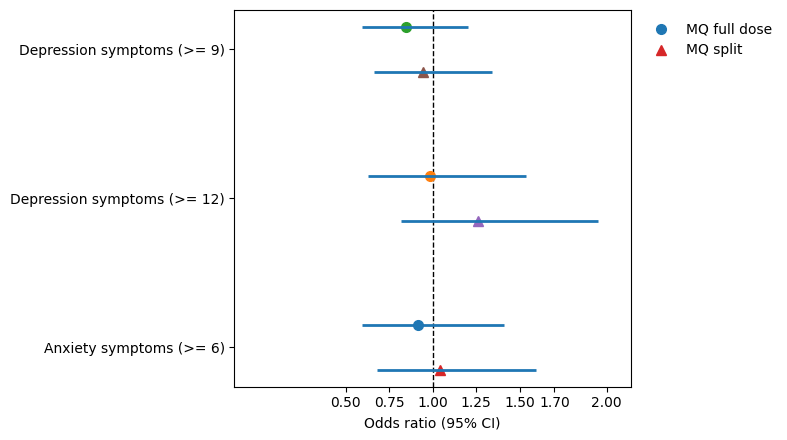

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Outcomes in the requested order
outcomes = [
    "Anxiety symptoms (>= 6)",
    "Depression symptoms (>= 12)",
    "Depression symptoms (>= 9)"
]

ors = {
    "Depression symptoms (>= 9)": {
        "MQ full dose":  {"or": 0.8468739, "ci": (0.5950171, 1.204283)},
        "MQ split":      {"or": 0.9423829, "ci": (0.6618180, 1.341424)},
    },
    "Depression symptoms (>= 12)": {
        "MQ full dose":  {"or": 0.9854369, "ci": (0.6311387, 1.5385985)},
        "MQ split":      {"or": 1.2621073, "ci": (0.8202348, 1.9487093)},
    },
    "Anxiety symptoms (>= 6)": {
        "MQ full dose":  {"or": 0.9156493, "ci": (0.5929422, 1.4122913)},
        "MQ split":      {"or": 1.0398755, "ci": (0.6776697, 1.5962859)},
    }
}

y_pos = np.arange(len(outcomes))
offset = 0.15

full_or  = [ors[o]["MQ full dose"]["or"] for o in outcomes]
full_ci  = [ors[o]["MQ full dose"]["ci"] for o in outcomes]
split_or = [ors[o]["MQ split"]["or"]     for o in outcomes]
split_ci = [ors[o]["MQ split"]["ci"]     for o in outcomes]

fig, ax = plt.subplots(figsize=(8, 4.5))

# Reference line at OR = 1
ax.axvline(x=1.0, linestyle='--', color='black', linewidth=1)

# Plot MQ full dose (circles) using default colors
for i, (point, (lo, hi)) in enumerate(zip(full_or, full_ci)):
    ax.plot(point, y_pos[i] + offset, 'o',
            markersize=7, label='MQ full dose' if i == 0 else "")
    ax.hlines(y=y_pos[i] + offset, xmin=lo, xmax=hi, linewidth=2)

# Plot MQ split (triangles) using default colors
for i, (point, (lo, hi)) in enumerate(zip(split_or, split_ci)):
    ax.plot(point, y_pos[i] - offset, '^',
            markersize=7, label='MQ split' if i == 0 else "")
    ax.hlines(y=y_pos[i] - offset, xmin=lo, xmax=hi, linewidth=2)

# Y axis
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)

# X axis centered around 1
all_los  = [lo for lo, hi in (full_ci + split_ci)]
all_his  = [hi for lo, hi in (full_ci + split_ci)]
xmin = min(all_los)
xmax = max(all_his)

# Symmetric range around 1
max_dev = max(1 - xmin, xmax - 1)
ax.set_xlim(1 - max_dev * 1.2, 1 + max_dev * 1.2)

# Ticks centered around 1
ax.set_xticks([0.5, 0.75, 1.0, 1.25, 1.5, 1.7, 2.0])
ax.set_xlabel("Odds ratio (95% CI)")

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False)

plt.tight_layout()
plt.show()


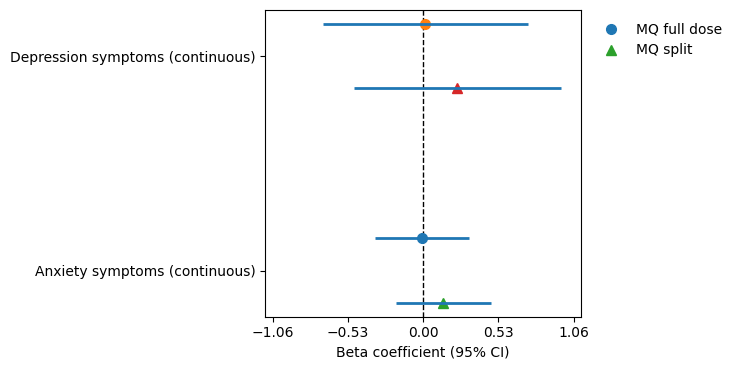

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Outcomes (top → bottom)
outcomes = [
    "Anxiety symptoms (continuous)",
    "Depression symptoms (continuous)"
]

# Betas and 95% CIs (MQ vs reference)
betas = {
    "Depression symptoms (continuous)": {
        "MQ full dose":  {"b": 0.01332,  "ci": (-0.7093958, 0.7360294)},
        "MQ split":      {"b": 0.24039,  "ci": (-0.4866516, 0.9674381)},
    },
    "Anxiety symptoms (continuous)": {
        "MQ full dose":  {"b": -0.006964, "ci": (-0.3392927, 0.3253641)},
        "MQ split":      {"b": 0.140197,  "ci": (-0.1941233, 0.4745178)},
    }
}

y_pos = np.arange(len(outcomes))
offset = 0.15  # vertical separation between groups

# Extract values in plotting order
full_b  = [betas[o]["MQ full dose"]["b"] for o in outcomes]
full_ci = [betas[o]["MQ full dose"]["ci"] for o in outcomes]
split_b = [betas[o]["MQ split"]["b"]     for o in outcomes]
split_ci= [betas[o]["MQ split"]["ci"]     for o in outcomes]

fig, ax = plt.subplots(figsize=(7.5, 3.8))

# Null line at 0
ax.axvline(x=0.0, linestyle='--', color='black', linewidth=1)

# MQ full dose (circles)
for i, (b, (lo, hi)) in enumerate(zip(full_b, full_ci)):
    ax.plot(b, y_pos[i] + offset, 'o', label='MQ full dose' if i == 0 else "", markersize=7)
    ax.hlines(y=y_pos[i] + offset, xmin=lo, xmax=hi, linewidth=2)

# MQ split (triangles)
for i, (b, (lo, hi)) in enumerate(zip(split_b, split_ci)):
    ax.plot(b, y_pos[i] - offset, '^', label='MQ split' if i == 0 else "", markersize=7)
    ax.hlines(y=y_pos[i] - offset, xmin=lo, xmax=hi, linewidth=2)

# Y axis
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)

# Center x-axis symmetrically around 0 with a bit of padding
all_los = [lo for lo, hi in (full_ci + split_ci)]
all_his = [hi for lo, hi in (full_ci + split_ci)]
max_dev = max(abs(min(all_los)), abs(max(all_his)))
ax.set_xlim(-max_dev * 1.15, max_dev * 1.15)

# Optional: neat ticks around zero (adjust if you prefer)
tick_span = round(max_dev * 1.1, 2)
ticks = np.linspace(-tick_span, tick_span, 5)
ax.set_xticks(ticks)

ax.set_xlabel('Beta coefficient (95% CI)')
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False)
plt.tight_layout()
plt.show()


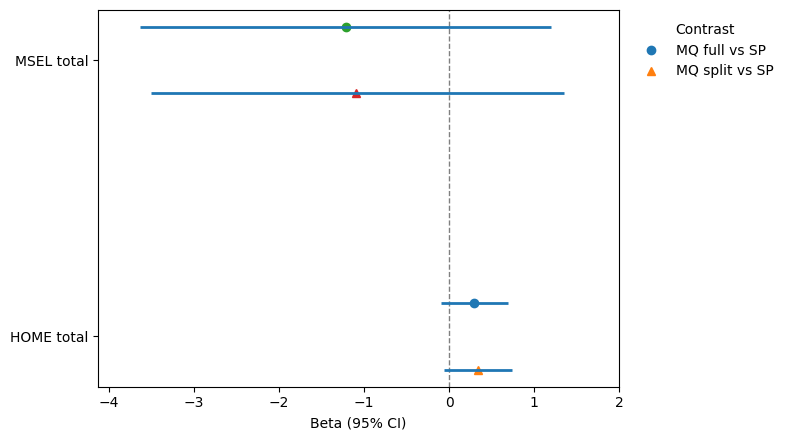

In [ ]:
import matplotlib.pyplot as plt

def plot_beta_forest(data,
                     xticks=None, savepath=None):
    """
    data: dict like
      {
        "HOME total":   {"MQ full vs SP": {"beta": 0.29, "ci": (-0.10, 0.69)},
                         "MQ split vs SP": {"beta": 0.34, "ci": (-0.06, 0.74)}},
        "MSEL total":   {"MQ full vs SP": {"beta": -1.21, "ci": (-3.63, 1.20)},
                         "MQ split vs SP": {"beta": -1.09, "ci": (-3.51, 1.35)}},
      }
    """
    outcomes = list(data.keys())
    contrasts = ["MQ full vs SP", "MQ split vs SP"]
    markers = {"MQ full vs SP": "o", "MQ split vs SP": "^"}
    offsets = {"MQ full vs SP": +0.12, "MQ split vs SP": -0.12}

    fig, ax = plt.subplots(figsize=(8, 4.5))
    ax.axvline(0.0, linestyle="--", linewidth=1, color="gray")

    y_base = list(range(len(outcomes)))
    all_los, all_his = [], []

    for i, outcome in enumerate(outcomes):
        for c in contrasts:
            if c not in data[outcome]:
                continue
            point = data[outcome][c]["beta"]
            lo, hi = data[outcome][c]["ci"]
            y = i + offsets[c]
            ax.plot(point, y, marker=markers[c], markersize=6, linestyle="", label=c if i == 0 else None)
            ax.hlines(y=y, xmin=lo, xmax=hi, linewidth=2)
            all_los.append(lo); all_his.append(hi)

    ax.set_yticks(y_base)
    ax.set_yticklabels(outcomes)
    ax.set_xlabel("Beta (95% CI)")
    if all_los and all_his:
        xmin, xmax = min(all_los), max(all_his)
        pad = 0.1 * (xmax - xmin if xmax > xmin else 1.0)
        ax.set_xlim(xmin - pad, xmax + pad)
    if xticks:
        ax.set_xticks(list(xticks))

    ax.legend(loc="upper left", bbox_to_anchor=(1.01, 1), frameon=False, title="Contrast")
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()


# ==== Your results ====
beta_data_main = {
    "HOME total": {
        "MQ full vs SP":  {"beta": 0.29, "ci": (-0.10, 0.69)},
        "MQ split vs SP": {"beta": 0.34, "ci": (-0.06, 0.74)},
    },
    "MSEL total": {
        "MQ full vs SP":  {"beta": -1.21, "ci": (-3.63, 1.20)},
        "MQ split vs SP": {"beta": -1.09, "ci": (-3.51, 1.35)},
    }
}

plot_beta_forest(
    beta_data_main,
    xticks=[-4, -3, -2, -1, 0, 1, 2]
)


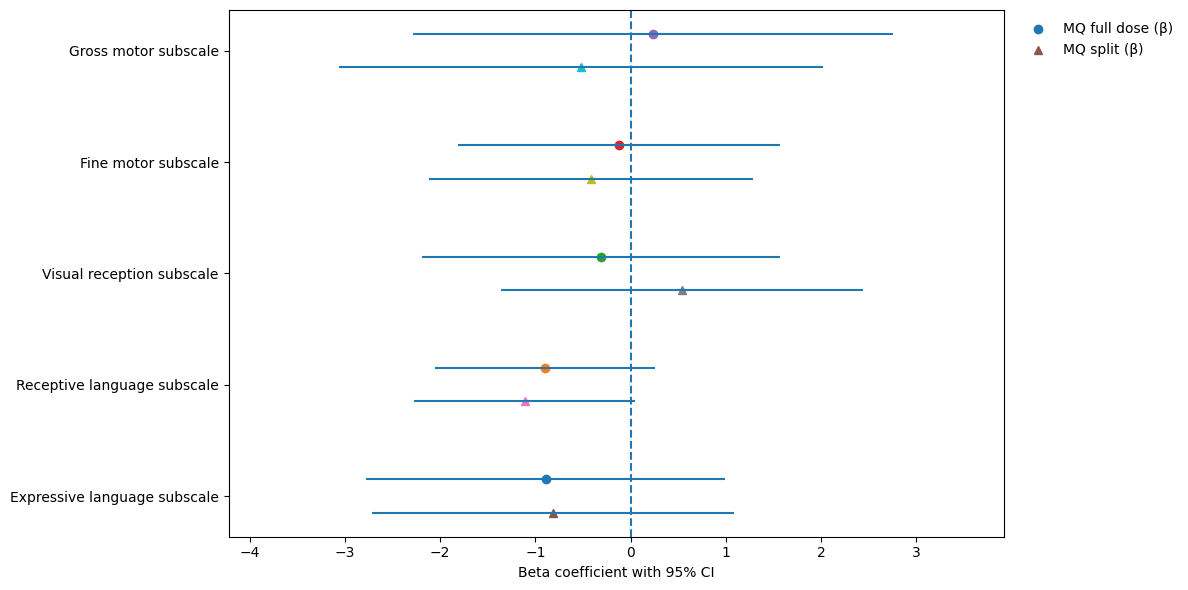

In [ ]:
# Forest plot for unadjusted beta coefficients:
# Effect of MQ regimen (full dose or split) vs reference on Mullen subscales

import matplotlib.pyplot as plt
import numpy as np

# Ordered labels (your order, without total score)
outcomes = [
    'Expressive language subscale',
    'Receptive language subscale',
    'Visual reception subscale',
    'Fine motor subscale',
    'Gross motor subscale'
]

# Unadjusted betas and 95% CIs from your GLMs (MQ vs reference)
# Each outcome has two entries: [MQ full dose, MQ split]
betas = {
    'Expressive language subscale':    [-0.8932,  -0.8156],
    'Receptive language subscale':     [-0.9014,  -1.1148],
    'Visual reception subscale':       [-0.3115,   0.5369],
    'Fine motor subscale':             [-0.1239,  -0.4180],
    'Gross motor subscale':             [0.2345,  -0.5205],
}

cis = {
    'Expressive language subscale':    [(-2.778192, 0.9916968),  (-2.715658, 1.0845108)],
    'Receptive language subscale':     [(-2.055836, 0.25307779), (-2.278484, 0.04897572)],
    'Visual reception subscale':       [(-2.195616, 1.572536),   (-1.362324, 2.436095)],
    'Fine motor subscale':             [(-1.813329, 1.565605),   (-2.121070, 1.285004)],
    'Gross motor subscale':            [(-2.283983, 2.753018),   (-3.059221, 2.018238)],
}

# Build arrays in plotting order
y_pos = np.arange(len(outcomes))
beta_full  = [betas[o][0] for o in outcomes]
beta_split = [betas[o][1] for o in outcomes]
ci_full    = [cis[o][0] for o in outcomes]
ci_split   = [cis[o][1] for o in outcomes]

fig, ax = plt.subplots(figsize=(12, 6))

# Reference line at 0 (no effect)
ax.axvline(x=0, linestyle='--')

# Offset so the two groups don't overlap
offset = 0.15

# MQ full dose (circles)
for i, (b, (lo, hi)) in enumerate(zip(beta_full, ci_full)):
    ax.plot(b, y_pos[i] + offset, 'o', label='MQ full dose (β)' if i == 0 else "")
    ax.hlines(y=y_pos[i] + offset, xmin=lo, xmax=hi)

# MQ split (triangles)
for i, (b, (lo, hi)) in enumerate(zip(beta_split, ci_split)):
    ax.plot(b, y_pos[i] - offset, '^', label='MQ split (β)' if i == 0 else "")
    ax.hlines(y=y_pos[i] - offset, xmin=lo, xmax=hi)

# Axes & labels
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)
ax.set_xlabel('Beta coefficient with 95% CI')

# X-limits to fit all CIs comfortably
xmin = min(min(lo for lo, _ in ci_full),  min(lo for lo, _ in ci_split))
xmax = max(max(hi for _, hi in ci_full),  max(hi for _, hi in ci_split))
pad = 0.2 * (xmax - xmin if xmax > xmin else 1.0)
ax.set_xlim(xmin - pad, xmax + pad)

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False)

plt.tight_layout()
plt.show()


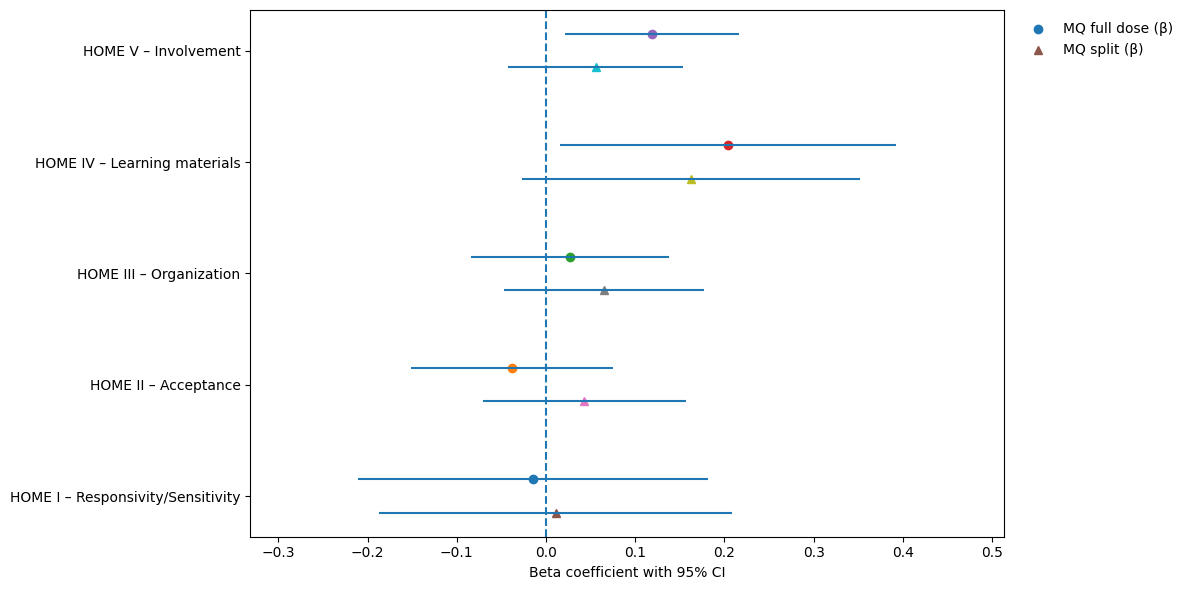

In [ ]:
# Forest plot of unadjusted beta coefficients (HOME scale)
# Effect of MQ regimen (full dose or split) vs reference on HOME subscales

import matplotlib.pyplot as plt
import numpy as np

# HOME domains in order (without total score)
outcomes = [
    'HOME I – Responsivity/Sensitivity',
    'HOME II – Acceptance',
    'HOME III – Organization',
    'HOME IV – Learning materials',
    'HOME V – Involvement'
]

# Betas (MQ vs reference): [MQ full dose, MQ split]
betas = {
    'HOME I – Responsivity/Sensitivity': [-0.01441,  0.01073],
    'HOME II – Acceptance':              [-0.03794,  0.04289],
    'HOME III – Organization':           [ 0.02677,  0.06532],
    'HOME IV – Learning materials':      [ 0.20386,  0.16217],
    'HOME V – Involvement':              [ 0.11883,  0.05571],
}

# 95% CIs: [(lo, hi) for MQ full dose, (lo, hi) for MQ split]
cis = {
    'HOME I – Responsivity/Sensitivity': [(-0.2109545, 0.1821249),  (-0.1869866, 0.2084491)],
    'HOME II – Acceptance':              [(-0.15112672, 0.07524129),(-0.07096954, 0.15675543)],
    'HOME III – Organization':           [(-0.08453503, 0.1380846), (-0.04665770, 0.1772964)],
    'HOME IV – Learning materials':      [( 0.01536171, 0.3923617), (-0.02745608, 0.3518039)],
    'HOME V – Involvement':              [( 0.02135268, 0.2163108), (-0.04235079, 0.1537761)],
}

# Build arrays in plotting order
y_pos = np.arange(len(outcomes))
beta_full  = [betas[o][0] for o in outcomes]
beta_split = [betas[o][1] for o in outcomes]
ci_full    = [cis[o][0]   for o in outcomes]
ci_split   = [cis[o][1]   for o in outcomes]

fig, ax = plt.subplots(figsize=(12, 6))

# Reference line at 0
ax.axvline(x=0, linestyle='--')

# Offset so points don't overlap
offset = 0.15

# MQ full dose (circles)
for i, (b, (lo, hi)) in enumerate(zip(beta_full, ci_full)):
    ax.plot(b, y_pos[i] + offset, 'o', label='MQ full dose (β)' if i == 0 else "")
    ax.hlines(y=y_pos[i] + offset, xmin=lo, xmax=hi)

# MQ split (triangles)
for i, (b, (lo, hi)) in enumerate(zip(beta_split, ci_split)):
    ax.plot(b, y_pos[i] - offset, '^', label='MQ split (β)' if i == 0 else "")
    ax.hlines(y=y_pos[i] - offset, xmin=lo, xmax=hi)

# Axes & labels
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)
ax.set_xlabel('Beta coefficient with 95% CI')

# X-limits to fit all CIs
xmin = min(min(lo for lo, _ in ci_full),  min(lo for lo, _ in ci_split))
xmax = max(max(hi for _, hi in ci_full),  max(hi for _, hi in ci_split))
pad = 0.2 * (xmax - xmin if xmax > xmin else 1.0)
ax.set_xlim(xmin - pad, xmax + pad)

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False)

plt.tight_layout()
plt.show()
